# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
app_train['YEARS_EMPLOYED'] = app_train['DAYS_EMPLOYED'] / -365
app_train['YEARS_EMPLOYED'] = app_train['YEARS_EMPLOYED'].fillna(app_train['YEARS_EMPLOYED'].mean())
app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,YEARS_EMPLOYED
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,1.745205
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,3.254795
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.616438
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,8.326027
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,8.323288
5,100008,0,0,M,0,1,0,99000.0,490495.5,27517.5,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,False,4.350685
6,100009,0,0,F,1,1,1,171000.0,1560726.0,41301.0,...,0,0,0.0,0.0,0.0,1.0,1.0,2.0,False,8.575342
7,100010,0,0,M,1,1,0,360000.0,1530000.0,42075.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,1.230137
8,100011,0,0,F,0,1,0,112500.0,1019610.0,33826.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,6.531971
9,100012,0,1,M,0,1,0,135000.0,405000.0,20250.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,5.531507


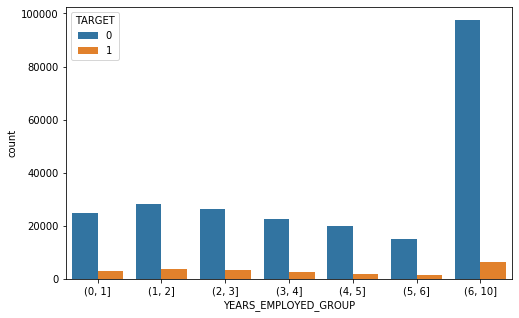

In [8]:
import seaborn as sns
grp = [0,1,2,3,4,5,6,10]
app_train['YEARS_EMPLOYED_GROUP'] = pd.cut(app_train['YEARS_EMPLOYED'], bins=grp)
plt.figure(figsize=[8,5])
sns.countplot(app_train['YEARS_EMPLOYED_GROUP'], hue=app_train['TARGET'])

In [11]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365
app_train['YEARS_BIRTH'] = app_train['YEARS_BIRTH'].fillna(app_train['YEARS_BIRTH'].mean())
app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,YEARS_EMPLOYED,YEARS_EMPLOYED_GROUP,YEARS_BIRTH
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,False,1.745205,"(1, 2]",25.920548
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,False,3.254795,"(3, 4]",45.931507
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,0.616438,"(0, 1]",52.180822
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,8.326027,"(6, 10]",52.068493
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,False,8.323288,"(6, 10]",54.608219
5,100008,0,0,M,0,1,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,1.0,1.0,False,4.350685,"(4, 5]",46.413699
6,100009,0,0,F,1,1,1,171000.0,1560726.0,41301.0,...,0.0,0.0,0.0,1.0,1.0,2.0,False,8.575342,"(6, 10]",37.747945
7,100010,0,0,M,1,1,0,360000.0,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,1.230137,"(1, 2]",51.643836
8,100011,0,0,F,0,1,0,112500.0,1019610.0,33826.5,...,0.0,0.0,0.0,0.0,0.0,1.0,False,6.531971,"(6, 10]",55.065753
9,100012,0,1,M,0,1,0,135000.0,405000.0,20250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,5.531507,"(5, 6]",39.641096


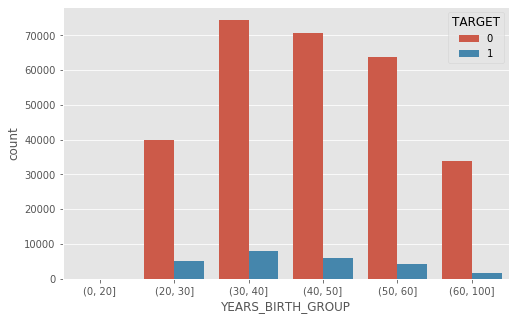

In [12]:
years_birth_grp = [0,20,30,40,50,60,100]
app_train['YEARS_BIRTH_GROUP'] = pd.cut(app_train['YEARS_BIRTH'], bins=years_birth_grp)
plt.figure(figsize=[8,5])
sns.countplot(app_train['YEARS_BIRTH_GROUP'], hue=app_train['TARGET'])

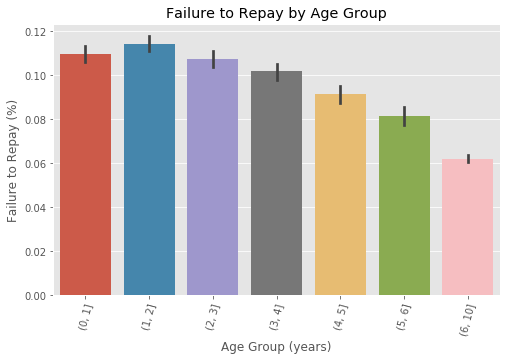

In [9]:
plt.style.use('ggplot')
plt.figure(figsize = [8, 5])

sns.barplot(app_train.YEARS_EMPLOYED_GROUP, app_train.TARGET)
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');